# Creating replicates of an experiment

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("../src")

from stochastic_glv_generator import *
from experiments import *

## Generating replicates

In [2]:
n = 5
seed = 1
r_max = 1.
A_diag_std = 1.
A_off_diag_std = 10.

p = sort_glv_params(n, seed, r_max, A_diag_std, A_off_diag_std)
r = p[:n]
A = p[n:].reshape((n, n))
x_eq = -np.linalg.inv(A)@r
print(x_eq)

np.random.seed(1)
init_perturb = np.random.choice([-1., 1.], n)*np.random.uniform(0.3, 0.6, n)
perturb_scale_list = np.array([0.5, 1., 2.])
t_samp_list = [np.sort(np.random.uniform(0, 20, 100)) for i in range(50)]
meas_noise_list = np.array([0.01])
repetitions = 1

env_noise = 0.05
t0 = 0
dt = 1e-2

replicates = gen_replicates(p, env_noise, init_perturb, perturb_scale_list, t0, dt, t_samp_list, meas_noise_list, repetitions, seed=0, scale_meas_noise_by_abund=True, save_datasets=True)
replicates

new matrix 2[0.15229594 0.2937585  0.04524194 0.08828342 0.078074  ]
150/150                                                                                             

,dataset,perturbation_scale,measurement_noise,time,sp1,sp2,sp3,sp4,sp5
0,0.0,0.5,0.01,0.180160,0.174162,0.353576,0.037401,0.068962,0.094647
1,0.0,0.5,0.01,0.233384,0.168345,0.355000,0.037076,0.070017,0.094435
2,0.0,0.5,0.01,0.596027,0.167221,0.346973,0.038289,0.067355,0.092070
3,0.0,0.5,0.01,0.683426,0.163291,0.348095,0.039397,0.067770,0.091590
4,0.0,0.5,0.01,0.906915,0.158728,0.337363,0.038838,0.068484,0.090676
...,...,...,...,...,...,...,...,...,...
14995,149.0,2.0,0.01,18.774107,0.162294,0.268153,0.020952,0.086995,0.061788
14996,149.0,2.0,0.01,19.181055,0.159708,0.286335,0.022098,0.087706,0.062499
14997,149.0,2.0,0.01,19.435586,0.152030,0.278448,0.022777,0.084045,0.065284
14998,149.0,2.0,0.01,19.910976,0.155793,0.292386,0.022652,0.089273,0.062339


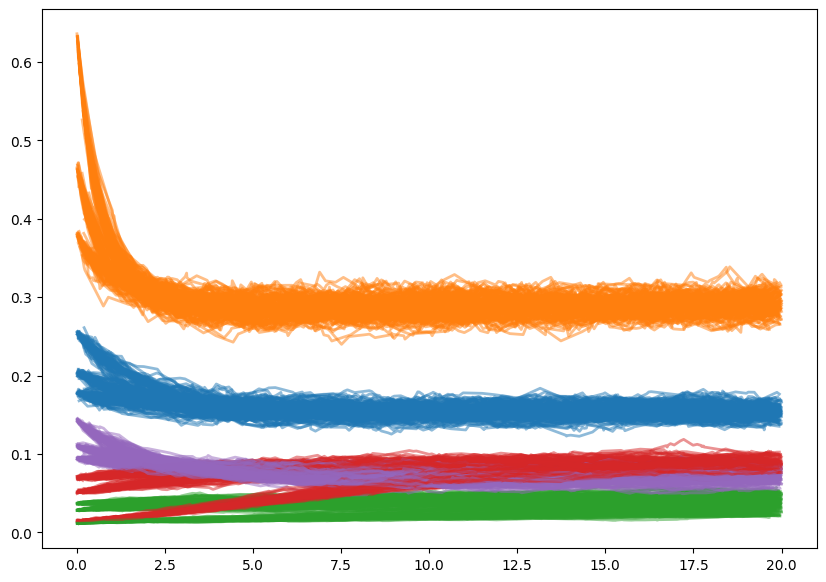

In [3]:
n_sp = sum(["sp" in col for col in replicates.columns])

plt.figure(figsize=(10, 7))
for dataset_num in replicates.dataset.unique():
    for sp in range(n):
        plt.plot(replicates[replicates.dataset==dataset_num].time, replicates[replicates.dataset==dataset_num][f"sp{sp+1}"], "-", c=f"C{sp}", lw=2, alpha=0.5)